In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import chi2
from scipy.special import psi
from math import log

from scipy.stats import gamma
from scipy.stats import lognorm
from fitter import Fitter

In [2]:
data_ff = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/florestal/20m/FF_20170112_20m_patches.csv')
data_fs = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/savanica/20m/FS_20170112_20m_patches.csv')
data_fc = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/campestre/20m/FC_20170112_20m_patches.csv')

In [3]:
data_ff

,dprvi_patch_0,prvi_patch_0,dpsvi_patch_0,dpsvim_patch_0,rvi_patch_0,dprvi_patch_1,prvi_patch_1,dpsvi_patch_1,dpsvim_patch_1,rvi_patch_1,...,dprvi_patch_48,prvi_patch_48,dpsvi_patch_48,dpsvim_patch_48,rvi_patch_48,dprvi_patch_49,prvi_patch_49,dpsvi_patch_49,dpsvim_patch_49,rvi_patch_49
0,0.556535,0.007414,0.049773,0.019418,0.775979,0.629658,0.017059,0.074730,0.044741,0.790664,...,0.732911,0.012868,0.054558,0.007199,1.129832,0.749867,0.009139,0.055716,0.032542,0.709585
1,0.526675,0.007200,0.060936,0.017336,0.926084,0.554087,0.012574,0.074558,0.039444,0.820963,...,0.633917,0.012322,0.049126,0.006905,1.071648,0.741768,0.008977,0.046459,0.029807,0.638364
2,0.369024,0.003325,0.071545,0.021325,0.965769,0.466645,0.007215,0.078586,0.045095,0.816834,...,0.806674,0.017346,0.052917,0.006021,1.169222,0.829041,0.011486,0.067519,0.014770,1.040355
3,0.538555,0.007461,0.070252,0.025524,0.902676,0.423124,0.005171,0.077369,0.054131,0.763754,...,0.858052,0.020632,0.070728,0.006682,1.343400,0.843561,0.011802,0.056761,0.015782,0.909566
4,0.785722,0.019455,0.136386,0.026427,1.338173,0.312898,0.002753,0.071699,0.062723,0.690934,...,0.930491,0.025361,0.091105,0.008121,1.462596,0.708198,0.008901,0.062389,0.013361,1.019700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.441925,0.006842,0.101243,0.029295,1.095463,0.484142,0.006818,0.069002,0.025162,0.895812,...,0.513181,0.006247,0.052186,0.010523,0.977681,0.456360,0.006744,0.048942,0.017603,0.792113
396,0.565665,0.009977,0.095050,0.040126,0.961003,0.604851,0.009654,0.076059,0.032467,0.883937,...,0.570534,0.007041,0.051821,0.015408,0.861357,0.490984,0.007300,0.052008,0.019328,0.801836
397,0.702413,0.013567,0.064817,0.034626,0.775481,0.700966,0.011835,0.071142,0.016267,1.044620,...,0.575941,0.007173,0.048954,0.018249,0.782826,0.478887,0.005921,0.041854,0.034740,0.558842
398,0.720219,0.013041,0.049877,0.036822,0.627066,0.744349,0.012760,0.062491,0.014438,0.996781,...,0.563837,0.007113,0.050996,0.017213,0.821507,0.443384,0.004834,0.028338,0.034447,0.408654


In [4]:
dprvi_patches = data_ff.filter(regex='^dprvi_patch', axis=1)
prvi_patches = data_ff.filter(regex='^prvi_patch', axis=1)
dpsvi_patches = data_ff.filter(regex='^dpsvi_patch', axis=1)
dpsvim_patches = data_ff.filter(regex='^dpsvim_patch', axis=1)
rvi_patches = data_ff.filter(regex='^rvi_patch', axis=1)

In [5]:
for column in dprvi_patches.columns:
    data = dprvi_patches[column]
    [shape,_, scale] = lognorm.fit(data)
    print(shape, scale)

0.009993019397950744 11.266789302961485
0.1142801329444516 1.1856249959189324
0.004799645394974336 30.157645476051442
0.016089981926124465 9.6677729179855
0.0763899480200454 1.5585264938859011
0.023665926111235566 6.059960800156386
0.005760551680550202 18.63403408321743
0.013711052146355058 9.08308355815082
0.010335327706123887 16.03094245630077
0.17548044347392341 0.7455901347671775
0.007462678842409212 18.145297917084235
0.04644243688955242 3.068874623870345
0.06977103026619771 1.915907037006479
0.009925139557519575 12.750923087101398
0.01658513000767845 7.115181314283298
0.08387441360042582 1.6252384035221041
0.011446868628593732 13.838245925655471
0.04557080214711004 3.0396153110127218
0.10644876833767526 1.2730487448618235
0.25216557551676233 0.4746427430665622
0.013538677556287283 11.978413426579227
0.1907189739213329 0.680343161303188
0.08703296181669569 1.0960206566588475
0.14072472940052866 0.9046474348294768
0.2261368428207549 0.5120232198430199
0.008574480563012108 16.860805

In [18]:
data_p = data_ff['prvi_patch_6']
data_q = data_ff['prvi_patch_7']

In [19]:
[shape_p, loc_p, scale_p] = lognorm.fit(data_p)
[shape_q, loc_q, scale_q] = lognorm.fit(data_q)

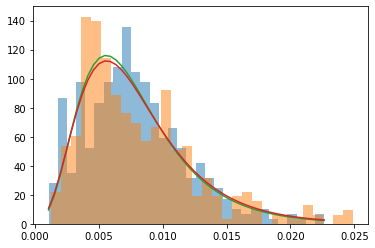

In [20]:
x = np.linspace(np.min(data_p), np.max(data_p))

plt.hist(data_p, bins=30, density=True, alpha=0.5)
plt.hist(data_q, bins=30, density=True, alpha=0.5)

plt.plot(x, lognorm.pdf(x, shape_p, loc_p, scale_p))
plt.plot(x, lognorm.pdf(x, shape_q, loc_q, scale_q))

In [21]:
mu_p = log(scale_p)
mu_q = log(scale_q)
#sigma_p = shape_p
#sigma_q = shape_q
var_p = np.power(shape_p, 2)
var_q = np.power(shape_q, 2)

m = data_p.count()
n = data_q.count()

# Kullback-Leibler distances (simmetrized)
dskl_ln = (var_p * np.power((mu_p - mu_q), 2) + var_q * np.power((mu_q - mu_p), 2) + np.power((var_p - var_q), 2)) / (4 * var_p * var_q)

s = ((2*m*n) / (m + n)) * dskl_ln # statistic

p_value = chi2.sf(s, df=2)

if p_value <= 0.05:
    print('Reject H0') # Reject H0
    
if p_value > 0.05:
    print('Accept H0') # Accept H0

Accept H0


In [22]:
# kp = a_p
# kq = a_q
# thetap = scale_p
# thetaq = scale_q

# dskl_ln = ((mup - muq)^2)/(2 * (sigma_p^2) * (sigma_q^2))

# dskl_g = ((kp - kq) * (psi(kp) + log(thetap) - psi(kq) - log(thetaq)) + ((kp*thetap - kq*thetaq) * ((thetap - thetaq) / (thetap * thetaq)))) / 2

# m = data_p.count()
# n = data_q.count()
# v = 1

# s = ((2*m*n*v) / (m + n)) * dskl_kn
 
# p_value = chi2.sf(s, df=2)

# if p_value <= 0.05:
#     print('Reject H0')

In [23]:
(2*m*n) / (m + n)

400.0

In [24]:
dskl_ln

0.001370512936470474

In [25]:
p_value

0.7602540788514562

In [17]:
s

8.645940385702907